# SENTIMENT ANALYSIS ON FEMALE REBOOT MOVIES #

The audience for movies and TV shows has become somewhat of a landmine when it comes to casting.

Hollywood has been churning out multiple inclusive films that have been known to make headlines for their either lack of inclusivity or too much inclusivity. The topic is a complicated one as social media is strongly divided on this matter.

One issue that seems to have a have struck a chord with many audiences is the films that are written out of reboots. Many films which originally had a lead cast of men had been rebooted to a female led movie and most of these films have been negatively received. Social media argues it is poor writing that is jumping on the feminism bandwagon and others say the audience just doesn't like the idea of female led movies.

We will observe some of these reboot films and non reboot films' reviews from IMDB and try to find the negative sentiment that involves topics of feminism.

In [163]:
#pip install gensim

In [164]:
import pandas as pd
import numpy as np
import json, os
import matplotlib.pyplot as plt
%matplotlib inline

import re
import string 

import sklearn
from sklearn.model_selection import train_test_split

# NLP packages
import nltk
import gensim
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

## Loading Female Reboot Movie Json Files ##

In [165]:
with open("reviews_" + 'tt5033998' + ".json", 'r') as f:
        charlie_angels = json.load(f)
        
with open("reviews_" + 'tt0110657' + ".json", 'r') as f:
        karate_kid = json.load(f)
        
with open("reviews_" + 'tt0283877' + ".json", 'r') as f:
        american_psycho = json.load(f)
        
with open("reviews_" + 'tt1289401' + ".json", 'r') as f:
        ghost = json.load(f)
        
with open("reviews_" + 'tt5164214' + ".json", 'r') as f:
        oceans = json.load(f)        
        
with open("reviews_" + 'tt7634968' + ".json", 'r') as f:
        what_men_want = json.load(f)        
        
with open("reviews_" + 'tt1298644' + ".json", 'r') as f:
        hustle = json.load(f)        
        
with open("reviews_" + "tt14500082" + ".json", 'r') as f:
        himyf = json.load(f)        
        
with open("reviews_" + "tt1563742" + ".json", 'r') as f:
        overboard = json.load(f)        
        
with open("reviews_" + "tt11771594" + ".json", 'r') as f:
        american_pie = json.load(f)        
        
        

## Rebooted Female Movies ##

In [166]:
female_reboots_dict = {"Charlie's Angels": 'tt5033998', "The Next Karate Kid": 'tt0110657',
                        "American Psycho II: All American Girl": "tt0283877",
                        "Ghostbusters":"tt1289401",
                         "Ocean's 8": "tt5164214",
                        "What Men Want": "tt7634968",
                        "The Hustle": "tt1298644",
                             "How I Met Your Father": "tt14500082",
                             "Overboard": "tt1563742",
                             "American Pie Presents: Girls' Rules":"tt11771594"
                          }

female_reboots_variable_dict = {"Charlie's Angels": charlie_angels, "The Next Karate Kid": karate_kid,
                        "American Psycho II: All American Girl": american_psycho,
                        "Ghostbusters":ghost,
                         "Ocean's 8": oceans,
                        "What Men Want": what_men_want,
                        "The Hustle": hustle,
                    "How I Met Your Father":himyf,
                    "Overboard": overboard,
                    "American Pie Presents: Girls' Rules": american_pie
                          }


## Loading Female Casted Movie Json Files ##

In [167]:
with open("reviews_" + 'tt1292566' + ".json", 'r') as f:
        how_to_be_single = json.load(f)
        
with open("reviews_" + 'tt2404463' + ".json", 'r') as f:
        the_heat = json.load(f)
        
with open("reviews_" + 'tt0204946' + ".json", 'r') as f:
        bring_it_on = json.load(f)
        
with open("reviews_" + 'tt0160862' + ".json", 'r') as f:
        she_all_that = json.load(f)
        
with open("reviews_" + 'tt0247638' + ".json", 'r') as f:
        princess_diary = json.load(f)        
        
with open("reviews_" + 'tt0430770' + ".json", 'r') as f:
        the_women = json.load(f)              
        
with open("reviews_" + "tt0119173" + ".json", 'r') as f:
        gi_jane = json.load(f)        
        
with open("reviews_" + "tt0304415" + ".json", 'r') as f:
        mona_lisa = json.load(f)        
        
with open("reviews_" + "tt0199626" + ".json", 'r') as f:
        in_the_cut = json.load(f) 
        
with open("reviews_" + "tt2140037" + ".json", 'r') as f:
        jane_got_gun = json.load(f)   
        
with open("reviews_" + "tt4566758" + ".json", 'r') as f:
        mulan = json.load(f)    
        
with open("reviews_" + "tt6017756" + ".json", 'r') as f:
        radioactive = json.load(f)         

with open("reviews_" + "tt3077214" + ".json", 'r') as f:
        suffragette = json.load(f) 
        
with open("reviews_" + "tt7713068" + ".json", 'r') as f:
        birds_of_prey = json.load(f) 
        
with open("reviews_" + "tt0370032" + ".json", 'r') as f:
        uv = json.load(f) 
        
with open("reviews_" + "tt0357277" + ".json", 'r') as f:
        elektra = json.load(f) 
        
with open("reviews_" + "tt2592614" + ".json", 'r') as f:
        resident_evil = json.load(f) 

## Female Cast Movies ##

In [168]:
female_cast_dict = {'How to Be Single': 'tt1292566' , 'The Heat' : 'tt2404463', 'Bring It On':'tt0204946',
                           'She’s All That':'tt0160862', 'The Princess Diaries':'tt0247638',
                           'The Women':'tt0430770', 'G.I. Jane':'tt0119173', 'Mona Lisa Smile':'tt0304415', 'In the Cut':'tt0199626',
                      'Jane Got a Gun':'tt2140037', 'Mulan': 'tt4566758','Radioactive': 'tt6017756','Suffragette':'tt3077214',
                    "Birds of Prey":"tt7713068","Ultraviolet":"tt0370032","Elektra":"tt0357277","Resident Evil: The Final Chapter":"tt2592614"
                      }


female_cast_variable_dict = {'How to Be Single': how_to_be_single , 'The Heat' : the_heat, 'Bring It On':bring_it_on,
                           'She’s All That':she_all_that, 'The Princess Diaries':princess_diary,
                           'The Women':the_women, 'G.I. Jane':gi_jane, 'Mona Lisa Smile':mona_lisa, 'In the Cut':in_the_cut,
                      'Jane Got a Gun':jane_got_gun, 'Mulan': mulan,'Radioactive': radioactive,'Suffragette':suffragette,
                             "Birds of Prey":birds_of_prey,"Ultraviolet":uv,"Elektra":elektra,"Resident Evil: The Final Chapter":resident_evil
                      }

**CREATE LISTS FOR FEMALE REBOOT MOVIES**

In [169]:
fr_movie_name_list =[]
fr_reviews_list = []
fr_ratings_list = []
fr_review_date_list = []
fr_users_list = []

for movie in female_reboots_variable_dict:
    print(movie)
    

    for nested_1 in female_reboots_variable_dict[movie]["reviews"]:
        


        for nested_2 in nested_1:


            dict_2 = nested_1[nested_2]


            for nested_3 in dict_2:


                if isinstance(nested_3, dict): 
                    

                    movie_name = movie
                    review = nested_3["full_review"]
                    rating = nested_3["rating_value"]
                    user = nested_3["reviewer_name"]
                    date = nested_3["review_date"]

                    fr_movie_name_list.append(movie_name)
                    fr_reviews_list.append(review)
                    fr_ratings_list.append(rating)
                    fr_review_date_list.append(date)
                    fr_users_list.append(user)
                else:
                    continue

Charlie's Angels
The Next Karate Kid
American Psycho II: All American Girl
Ghostbusters
Ocean's 8
What Men Want
The Hustle
How I Met Your Father
Overboard
American Pie Presents: Girls' Rules


**CREATE LISTS FOR FEMALE CAST MOVIES**

In [170]:
fc_movie_name_list =[]
fc_reviews_list = []
fc_ratings_list = []
fc_review_date_list = []
fc_users_list = []

for movie in female_cast_variable_dict:
    print(movie)
    

    for nested_1 in female_cast_variable_dict[movie]["reviews"]:
        


        for nested_2 in nested_1:


            dict_2 = nested_1[nested_2]


            for nested_3 in dict_2:


                if isinstance(nested_3, dict): 
                    

                    movie_name = movie
                    review = nested_3["full_review"]
                    rating = nested_3["rating_value"]
                    user = nested_3["reviewer_name"]
                    date = nested_3["review_date"]

                    fc_movie_name_list.append(movie_name)
                    fc_reviews_list.append(review)
                    fc_ratings_list.append(rating)
                    fc_review_date_list.append(date)
                    fc_users_list.append(user)
                else:
                    continue

How to Be Single
The Heat
Bring It On
She’s All That
The Princess Diaries
The Women
G.I. Jane
Mona Lisa Smile
In the Cut
Jane Got a Gun
Mulan
Radioactive
Suffragette
Birds of Prey
Ultraviolet
Elektra
Resident Evil: The Final Chapter


# CREATING DATAFRAME #

In [171]:
df_fr = pd.DataFrame.from_dict({"Movie": fr_movie_name_list,"User":fr_users_list, "Reviews": fr_reviews_list, "Ratings": fr_ratings_list, "Date Posted": fr_review_date_list})  

In [172]:
df_fc = pd.DataFrame.from_dict({"Movie": fc_movie_name_list,"User":fc_users_list, "Reviews": fc_reviews_list, "Ratings": fc_ratings_list, "Date Posted": fc_review_date_list})  

In [173]:
df_fr.groupby("Movie")["Ratings"].agg('count')

Movie
American Pie Presents: Girls' Rules       235
American Psycho II: All American Girl     247
Charlie's Angels                         1247
Ghostbusters                             2546
How I Met Your Father                     722
Ocean's 8                                1149
Overboard                                 456
The Hustle                                687
The Next Karate Kid                       141
What Men Want                             345
Name: Ratings, dtype: int64

In [174]:
df_fc.groupby("Movie")["Ratings"].agg('count')

Movie
Birds of Prey                       2698
Bring It On                          406
Elektra                              431
G.I. Jane                            172
How to Be Single                     181
In the Cut                           396
Jane Got a Gun                       105
Mona Lisa Smile                      301
Mulan                               2995
Radioactive                          217
Resident Evil: The Final Chapter     468
She’s All That                       427
Suffragette                          142
The Heat                             468
The Princess Diaries                 352
The Women                            152
Ultraviolet                          863
Name: Ratings, dtype: int64

In [175]:
df_all  = pd.concat([df_fr, df_fc])

In [176]:
df_all.shape

(18549, 5)

## DATA CLEANING ##

In [177]:
df_2 =df_all.copy()

In [178]:
def remove_new_line(text):
    text = text.replace("\n"," ")
    text = text.replace("\t"," ")
    
    return text

In [179]:
df_2["Reviews"] = df_2["Reviews"].apply(remove_new_line)

In [180]:
def remove_num(text):
    
    check = bool(re.search(r'\d+', text))
    if check == True:
        text = re.sub(" \d+", " ", text)
    
    return text

In [181]:
df_2["Reviews"] = df_2["Reviews"].apply(remove_num)

In [182]:
#Function to remove punctuation

def remove_punc(text):

    text = text.translate(str.maketrans('', '', string.punctuation))
    
    return text

In [183]:
df_2["Reviews"] = df_2["Reviews"].apply(remove_punc)

In [184]:
def go_lower(text):
    text = text.lower()
    return text

In [185]:
df_2["Reviews"] = df_2["Reviews"].apply(go_lower)

In [186]:
#pip install clean-text


In [187]:
from cleantext import clean

def no_emoji(text):
    clean_text = clean(text, no_emoji = True)
    
    return clean_text
    
df_2["Reviews"] = df_2["Reviews"].apply(no_emoji)

In [188]:
# Function to remove stopwords 
from nltk.corpus import stopwords

def remove_stops(text):
    
    stop_words = set(stopwords.words("english"))
    
    word_tokens = word_tokenize(text)
    
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    

    
    filtered_sentence_str = ' '.join(filtered_sentence)
    
    return filtered_sentence_str
    
    

In [189]:
df_2["No_stop"] = df_2["Reviews"].apply(remove_stops)

In [190]:
def rating_classifier(rating):
    
    if rating >= 6:
        rating_class = 1
    else:
        rating_class = 0
        
    return rating_class
        

In [191]:
df_2["Ratings"] = pd.to_numeric(df_2["Ratings"])

In [192]:
df_2["Ratings"] = df_2["Ratings"].fillna(df_2["Ratings"].median())

In [193]:
df_2["Ratings"].isna().sum()

0

In [194]:
df_2["Rating Class"] = df_2["Ratings"].apply(rating_classifier)

**We will tokenize the reviews and add a column for that**

In [195]:
def tokenizer(text):
    tokens = word_tokenize(text)
    
    return tokens

**We will stem the reviews and add a column for that**

In [196]:
from nltk.stem import WordNetLemmatizer
  
#nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\farhanhasan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [197]:
def lemmas(tokens):
    
    lemmatizer = WordNetLemmatizer()
    
    lemmatized = []
    
    for token in tokens:
        
    
        lemma_word = lemmatizer.lemmatize(token)
        lemmatized.append(lemma_word)
    
    return lemmatized

In [198]:
df_3 = df_2.copy()

In [199]:
df_3["Tokens"] = df_3["No_stop"].apply(tokenizer)

In [200]:
df_3["Tokens"] = df_3["Tokens"].apply(lemmas)

In [201]:
df_3.head()

,Movie,User,Reviews,Ratings,Date Posted,No_stop,Rating Class,Tokens
0,Charlie's Angels,FeastMode,,2.0,12 March 2020,,0,[]
1,Charlie's Angels,westsideschl,i had considered four stars really weak action...,2.0,30 March 2020,considered four stars really weak action scene...,0,"[considered, four, star, really, weak, action,..."
2,Charlie's Angels,cricketbat,the charlies angels movies in the early s were...,3.0,24 February 2020,charlies angels movies early lot fun charlies ...,0,"[charlies, angel, movie, early, lot, fun, char..."
3,Charlie's Angels,jblue-11387,is this the best hollywood can put together fo...,3.0,23 November 2019,best hollywood put together female movie eithe...,0,"[best, hollywood, put, together, female, movie..."
4,Charlie's Angels,Top_Dawg_Critic,probably one of the better if not the best per...,7.0,18 February 2020,probably one better best performance stewart a...,1,"[probably, one, better, best, performance, ste..."


In [202]:
df_3["Tokens"] = df_3["Tokens"].apply(lambda x : np.NaN if len(x) == 0 else x)

df_3["Tokens"].isna().sum()

7361

In [203]:
df_3.dropna(inplace = True)

In [204]:
df_3.shape

(11188, 8)

## UNSUPERVISED LEARNING ##

In [205]:
#Training a Word2Vec Model

w2v_model_unsupervise = Word2Vec(df_3["Tokens"], min_count = 3,
                                window = 5,
                                vector_size = 300,
                                epochs = 10
                                )

In [206]:
keyed_vectors = w2v_model_unsupervise.wv
keyed_vocab = keyed_vectors.key_to_index

In [207]:
# negative_vectors = keyed_vectors.most_similar('terrible',topn=36)
# negative_vectors

In [208]:
# negative_concepts = [i for i,j in negative_vectors]

# negative_concepts

In [209]:
# remove_negatives = ['writing','beyond','wooden','script','biggest','simply','direction']
# negative_concepts = [concept for concept in negative_concepts  if concept not in remove_negatives]
# negative_concepts

In [210]:
negative_concepts = ['horrible',
 'awful',
 'poor',
 'mediocre',
 'dreadful',
 'lazy',
 'redeeming',
 'crappy',
 'atrocious',
 'suck',
 'directing',
 'appalling',
 'subpar',
 'bad',
 'disappointing',
 'lousy',
 'weak',
 'fault',
 'unfunny',
 'uninspired',
 'shoddy',
 'sucked',
 'irredeemable',
 'shame',
 'pathetic',
 'lame',
 'embarrassing',
 'forgettable',
 'plain']

**Before we proceed we need to split our datasets into the female reboot films and the original plot films.**

In [211]:
female_reboots_dict

{"Charlie's Angels": 'tt5033998',
 'The Next Karate Kid': 'tt0110657',
 'American Psycho II: All American Girl': 'tt0283877',
 'Ghostbusters': 'tt1289401',
 "Ocean's 8": 'tt5164214',
 'What Men Want': 'tt7634968',
 'The Hustle': 'tt1298644',
 'How I Met Your Father': 'tt14500082',
 'Overboard': 'tt1563742',
 "American Pie Presents: Girls' Rules": 'tt11771594'}

In [212]:
reboot_movies = [i for i,j in female_reboots_dict.items()]
reboot_movies

["Charlie's Angels",
 'The Next Karate Kid',
 'American Psycho II: All American Girl',
 'Ghostbusters',
 "Ocean's 8",
 'What Men Want',
 'The Hustle',
 'How I Met Your Father',
 'Overboard',
 "American Pie Presents: Girls' Rules"]

In [213]:
n = 0

for movie in df_3["Movie"]:
    if movie in reboot_movies:
        n += 1
n

4791

In [214]:
df_3_fr = df_3.iloc[:n,:].copy()

In [215]:
df_3_fc = df_3.iloc[n:,:].copy()

In [216]:
df_3_fc.groupby("Movie")["Ratings"].agg("count")

Movie
Birds of Prey                       1903
Bring It On                          190
Elektra                              159
G.I. Jane                             79
How to Be Single                      89
In the Cut                           157
Jane Got a Gun                        43
Mona Lisa Smile                      135
Mulan                               2225
Radioactive                          140
Resident Evil: The Final Chapter     198
She’s All That                       251
Suffragette                           46
The Heat                             194
The Princess Diaries                 194
The Women                             72
Ultraviolet                          322
Name: Ratings, dtype: int64

In [217]:
df_3_fr["Tokens"].isna().sum()

0

In [218]:
df_3_fc["Tokens"].isna().sum()

0

In [219]:
df_3_fc.drop(df_3_fc[df_3_fc["User"] == 'tahajinjin'].index, inplace = True)

## TopN Semantic Sentiment Analysis (TopSSA) ##

In [231]:
def list_similarity(keyed_vectors, 
                    wordlist1, 
                    wordlist2):
    """ A function to calculate vector similarity between 2 lists of tokens"""
    wv1= np.array([keyed_vectors[wd] for wd in wordlist1 if wd in keyed_vectors])
    wv2= np.array([keyed_vectors[wd] for wd in wordlist2 if wd in keyed_vectors])
    
#     print("wv1:",wv1)
#     print("wv1 shape", wv1.shape)
#     print("wv2:",wv2)

    
#     if len(wordlist2) < 2:
        
#         print("Error")
#         return np.zeros(5)
    
#     else:
          
    
    #calculate the vector norms along x direction and then increase the dimension
    #using np.newaxis
    wv1_norm = np.linalg.norm(wv1, axis=1)[:, np.newaxis]
    wv2_norm = np.linalg.norm(wv2, axis=1)[:, np.newaxis] 
    
    #print("wv1_norm:",wv1_norm)
    #iiiprint("wv2 before", wv2)

    #Divide the vector by their sum to get the unit vectors
    wv1 /= wv1_norm
    wv2 /= wv2_norm
    
#     print("wv2 norm", wv2_norm)
#     print("wv2", wv2)
    
    #print("dot product" , np.dot(wv1, np.transpose(wv2)) )

    return np.dot(wv1, np.transpose(wv2))
    

In [232]:
def calculate_topn_similarity_score(keyed_vectors, 
                          target_tokens, 
                          doc_tokens,
                          topn: int = 10) -> float:
    """ The function defines the similarity of a single word to a document, 
    as the average of its similarity with the top_n most similar words in that document. 
    To calculate the similarity score it calculates the similarity of every word in the target_tokens set with all the words in the doc_tokens, 
    and keeps the top_n highest scores for each word and then averages over all the kept scores.
    -----
    Parameters:
    target_tokens List[str] : A list of sentiment or opinion words that indicate negative or positive opinions  
    
    doc_tokens List[str]    : A tokenized document 
    
    keyed_vectors           : A word2vec vocabulary model
    
    topn (int)              : An int that indicates the number of
    most similar vectors used to calculate the similarity score.
    
    Returns:
    vector similarity scores between 2 tokenized list doc_tokens and target_tokens  
    """
    topn = min(topn, round(len(doc_tokens)))
    
    #print("topn", topn)
    
    target_tokens = [token for token in target_tokens if token in keyed_vectors]

    doc_tokens = [token for token in doc_tokens if token in keyed_vectors]
    
#     print("target token", target_tokens)
    
#     print("doc token", doc_tokens)
    
    sim_matrix = list_similarity(keyed_vectors=keyed_vectors, 
                                 wordlist1=target_tokens,
                                 wordlist2=doc_tokens)
    
    #print("Sim matrix before cut down", sim_matrix)
    
    sim_matrix = np.sort(sim_matrix, axis=1)[:, -topn:]
    
    #print("Sim matrix", sim_matrix)
     
    similarity_score = np.mean(sim_matrix)
    
    #normalizing score with the length of the review tokens
    
    similarity_score_norm = similarity_score/np.cbrt(len(doc_tokens))
    
    #print("Similarity score after np mean", similarity_score)
    
    
    return similarity_score_norm

In [233]:
feminism_words = keyed_vectors.most_similar('female',topn=20)
feminism_words

[('male', 0.7873702645301819),
 ('woman', 0.7131725549697876),
 ('allfemale', 0.696114718914032),
 ('gender', 0.6699130535125732),
 ('strong', 0.6288986206054688),
 ('member', 0.621770977973938),
 ('hero', 0.5996674299240112),
 ('allstar', 0.5695887804031372),
 ('diverse', 0.5592836737632751),
 ('feisty', 0.5554326176643372),
 ('lead', 0.5462784171104431),
 ('protagonist', 0.5444836616516113),
 ('dominated', 0.5433416366577148),
 ('chauvinist', 0.5348730087280273),
 ('individually', 0.5320371985435486),
 ('malefemale', 0.5312439203262329),
 ('feminist', 0.5254117250442505),
 ('alienates', 0.5226941704750061),
 ('dominant', 0.5216579437255859),
 ('commonly', 0.5187801122665405)]

In [234]:
feminism_key_words = ['sexist','feminism','allfemale','woman']

In [235]:
feminism_tuples = keyed_vectors.most_similar(feminism_key_words, topn = 25)
feminism_tuples

[('equality', 0.8740783929824829),
 ('feminist', 0.8693879842758179),
 ('bashing', 0.8604409098625183),
 ('gender', 0.8453390002250671),
 ('manhating', 0.8323900699615479),
 ('sexism', 0.8295688629150391),
 ('equal', 0.8285532593727112),
 ('men', 0.8219125270843506),
 ('male', 0.8212230801582336),
 ('idiot', 0.8109242916107178),
 ('agenda', 0.8109032511711121),
 ('racist', 0.809375524520874),
 ('sexualized', 0.8064285516738892),
 ('alienates', 0.8057956695556641),
 ('hurt', 0.8047817349433899),
 ('treated', 0.8041601777076721),
 ('antimale', 0.8024811148643494),
 ('hating', 0.7928338050842285),
 ('shouldnt', 0.7917259335517883),
 ('misogynist', 0.7877236008644104),
 ('propaganda', 0.7867045402526855),
 ('issue', 0.7859598398208618),
 ('pig', 0.7821454405784607),
 ('dominated', 0.7733268141746521),
 ('statement', 0.7732599377632141)]

In [236]:
# remove = ['bashing','bash','agenda','aholes','idiot','equal','political','perceive','treated','issue','hurt','radical']

# feminism_concept = [i for i,j in feminism_tuples if i not in remove]

# feminism_concept

In [237]:
feminism_concept = ['equality',
 'feminist',
 'manhating',
 'sexualized',
 'sexism',
 'antimale',
 'objectified',
 'toxic',
 'misogynist']

In [238]:
df_3_fc["length"]  = df_3_fc["Tokens"].apply(lambda x : len(x))

df_3_fr["length"]  = df_3_fr["Tokens"].apply(lambda x : len(x))

In [239]:

def topn_feminism_sentiment(keyed_vectors, 
                                      feminism_target_tokens,
                                      negative_target_tokens,
                                      doc_tokens,
                                      topn: int = 10) -> float:
    """
    A function to calculate the feminism sentiment of the text in a negative context by measuring vector similarity between 
    doc_tokens and a feminism_target_tokens (as feminism_score) then measuring vector similarity between 
    doc_tokens and a negative_target_tokens (as negative_score), and adding these scores
    
    Parameters:
    keyed_vectors           : A word2vec vocabulary model
    feminism_target_tokens  : A list of sentiment or opinion words that indicate feminism opinions 
    negative_target_tokens  : A list of sentiment or opinion words that indicate negative opinions  
    doc_tokens              : A tokenized document 
    
    
    Returns:
    feminism_score            : vector similarity scores between doc_tokens and feminism_target_tokens
    negative_score            : vector similarity scores between doc_tokens and negative_target_tokens
    
    semantic_sentiment_score  : feminism_score + negative_score
    
    """
  
    feminism_score = doc_tokens.apply(lambda x: calculate_topn_similarity_score(keyed_vectors=keyed_vectors, 
                                                                 target_tokens=feminism_target_tokens, 
                                                                 doc_tokens=x,
                                                                     topn=topn))


    
    #print("feminism score", feminism_score)
                                      
    negative_score = doc_tokens.apply(lambda x: calculate_topn_similarity_score(keyed_vectors=keyed_vectors, 
                                                                 target_tokens=negative_target_tokens, 
                                                                 doc_tokens=x,
                                                                     topn=topn))

    semantic_sentiment_score = feminism_score + negative_score
    
    #print("neg fem score", semantic_sentiment_score)
    
    
                                          
    return semantic_sentiment_score

# APPLYING SENTIMENT FUNCTIONS TO DATAFRAMES #

In [240]:
feminism_scores_fr = topn_feminism_sentiment (keyed_vectors = keyed_vectors,
                                                   feminism_target_tokens = feminism_concept, 
                                                   negative_target_tokens = negative_concepts,
                                                   doc_tokens =  df_3_fr["Tokens"],
                                                     topn=30)

df_3_fr['neg_fem_sent_score_norm'] = feminism_scores_fr

In [241]:
feminism_scores_fc = topn_feminism_sentiment (keyed_vectors = keyed_vectors,
                                                   feminism_target_tokens = feminism_concept, 
                                                   negative_target_tokens = negative_concepts,
                                                   doc_tokens =  df_3_fc["Tokens"],
                                                     topn=30)

df_3_fc['neg_fem_sent_score_norm'] = feminism_scores_fc

In [242]:
df_3_fc.iloc[1393,:]

Movie                                                         Jane Got a Gun
User                                                             j-eric-john
Reviews                    this was an amazingly wellcrafted movie from b...
Ratings                                                                 10.0
Date Posted                                                  5 February 2022
No_stop                    amazingly wellcrafted movie beginning end movi...
Rating Class                                                               1
Tokens                     [amazingly, wellcrafted, movie, beginning, end...
length                                                                    43
neg_fem_sent_score_norm                                              0.24877
Name: 2944, dtype: object

In [243]:
df_3_fc.sort_values("neg_fem_sent_score_norm", ascending = False)

,Movie,User,Reviews,Ratings,Date Posted,No_stop,Rating Class,Tokens,length,neg_fem_sent_score_norm
3534,Mulan,trokanmariel-17760,unaphraided imfaptseizured x no eucatch,8.0,3 January 2021,unaphraided imfaptseizured x eucatch,1,"[unaphraided, imfaptseizured, x, eucatch]",4,0.995239
8329,Birds of Prey,edes-50337,i think chemotherapy is easier to endure than ...,1.0,6 March 2021,think chemotherapy easier endure,0,"[think, chemotherapy, easier, endure]",4,0.615194
7631,Birds of Prey,thomasbeale-91789,this movie is so terrible omg it is so disgust...,1.0,1 June 2020,movie terrible omg disgusting gtfo,0,"[movie, terrible, omg, disgusting, gtfo]",5,0.597450
57,How to Be Single,ibrahimak-94397,the movie has no purpose whatsoever no redeemi...,1.0,13 October 2018,movie purpose whatsoever redeeming qualities,0,"[movie, purpose, whatsoever, redeeming, quality]",5,0.558812
3420,Mulan,parinirmita,an amazing balance has been achieved in all as...,9.0,11 September 2020,amazing balance achieved aspects,1,"[amazing, balance, achieved, aspect]",4,0.551093
...,...,...,...,...,...,...,...,...,...,...
8696,Birds of Prey,julidjensen,i loved watching this so much fun action hope ...,10.0,17 February 2020,loved watching much fun action hope,1,"[loved, watching, much, fun, action, hope]",6,0.109556
4624,Mulan,sorayabrandao,really enjoy watching mulan with my family i h...,10.0,21 December 2020,really enjoy watching mulan family hope see se...,1,"[really, enjoy, watching, mulan, family, hope,...",10,0.106389
3442,Mulan,jimmyr7,my family and i have watched the animated mula...,9.0,29 December 2020,family watched animated mulan years loved well...,1,"[family, watched, animated, mulan, year, loved...",28,0.105387
384,The Heat,jeannette-frey,love to see sandra bullock and melissa mccarth...,8.0,30 April 2019,love see sandra bullock melissa mccarthy nice ...,1,"[love, see, sandra, bullock, melissa, mccarthy...",10,0.101406


In [244]:
df_3_fc.reset_index(drop=True ,inplace = True)

In [245]:
df_3_fc[df_3_fc["User"] == 'jayjaycee'].index[0]

3927

In [247]:
df_3_fc[df_3_fc["Rating Class"] == 0]["neg_fem_sent_score_norm"].mean()

0.2406375356550587

In [248]:
df_3_fr[df_3_fr["Rating Class"] == 0]["neg_fem_sent_score_norm"].mean()

0.2450398138914054

In [249]:
df_3_fc.shape

(6396, 10)

In [250]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

df_3_fc["Detokens"] = df_3_fc["Tokens"].apply(lambda x: TreebankWordDetokenizer().detokenize(x))

In [251]:
df_3_fr["Detokens"] = df_3_fr["Tokens"].apply(lambda x: TreebankWordDetokenizer().detokenize(x))

In [252]:
df_3_fc.head()

,Movie,User,Reviews,Ratings,Date Posted,No_stop,Rating Class,Tokens,length,neg_fem_sent_score_norm,Detokens
0,How to Be Single,smatysia,this is a better than average romantic comedy ...,8.0,23 December 2016,better average romantic comedy gave one extra ...,1,"[better, average, romantic, comedy, gave, one,...",64,0.233290,better average romantic comedy gave one extra ...
1,How to Be Single,sammyboo21-999-252517,ill be honest i was dragged to this movie by a...,8.0,9 March 2016,ill honest dragged movie girl friend tired rom...,1,"[ill, honest, dragged, movie, girl, friend, ti...",88,0.225286,ill honest dragged movie girl friend tired rom...
2,How to Be Single,anaconda-40658,how to be single 2016 dir christian ditter cas...,4.0,3 March 2016,single 2016 dir christian ditter cast dakota j...,0,"[single, 2016, dir, christian, ditter, cast, d...",157,0.237785,single 2016 dir christian ditter cast dakota j...
3,How to Be Single,djuka_007-984-382493,my god what a terrible movie i know that i sho...,1.0,8 May 2016,god terrible movie know shouldnt high standard...,0,"[god, terrible, movie, know, shouldnt, high, s...",74,0.256640,god terrible movie know shouldnt high standard...
4,How to Be Single,callumkirby,as suggested above this isnt the kind of movie...,8.0,21 February 2017,suggested isnt kind movie would watch watching...,1,"[suggested, isnt, kind, movie, would, watch, w...",76,0.225459,suggested isnt kind movie would watch watching...


In [253]:
from collections import defaultdict
import seaborn as sns

def ngram_extractor(text, n_gram):
    token = [token for token in text.lower().split(" ") if token != "" ]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]


def generate_ngrams(df, n_gram, max_row):
    temp_dict = defaultdict(int)
    for review in df:
        for word in ngram_extractor(review, n_gram):
            temp_dict[word] += 1
    temp_df = pd.DataFrame(sorted(temp_dict.items(), key=lambda x: x[1])[::-1]).head(max_row)
    temp_df.columns = ["word", "wordcount"]
    return temp_df

In [254]:
df_3_fr.head()

,Movie,User,Reviews,Ratings,Date Posted,No_stop,Rating Class,Tokens,length,neg_fem_sent_score_norm,Detokens
1,Charlie's Angels,westsideschl,i had considered four stars really weak action...,2.0,30 March 2020,considered four stars really weak action scene...,0,"[considered, four, star, really, weak, action,...",70,0.280946,considered four star really weak action scene ...
2,Charlie's Angels,cricketbat,the charlies angels movies in the early s were...,3.0,24 February 2020,charlies angels movies early lot fun charlies ...,0,"[charlies, angel, movie, early, lot, fun, char...",44,0.245019,charlies angel movie early lot fun charlies an...
3,Charlie's Angels,jblue-11387,is this the best hollywood can put together fo...,3.0,23 November 2019,best hollywood put together female movie eithe...,0,"[best, hollywood, put, together, female, movie...",24,0.226730,best hollywood put together female movie eithe...
4,Charlie's Angels,Top_Dawg_Critic,probably one of the better if not the best per...,7.0,18 February 2020,probably one better best performance stewart a...,1,"[probably, one, better, best, performance, ste...",64,0.240361,probably one better best performance stewart a...
5,Charlie's Angels,alzm68,kristen stewart is till gorgeous this boxoffic...,7.0,19 October 2020,kristen stewart till gorgeous boxoffice flippi...,1,"[kristen, stewart, till, gorgeous, boxoffice, ...",12,0.277990,kristen stewart till gorgeous boxoffice flippi...


C:\Users\farhanhasan\AppData\Local\Temp\ipykernel_3280\2675529874.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ans_bigram = generate_ngrams(df_3_fc[(df_3_fr["Rating Class"] == 0) & (df_3_fc["neg_fem_sent_score_norm"] > 0.2)]["Detokens"], 2, 60)
C:\Users\farhanhasan\Anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


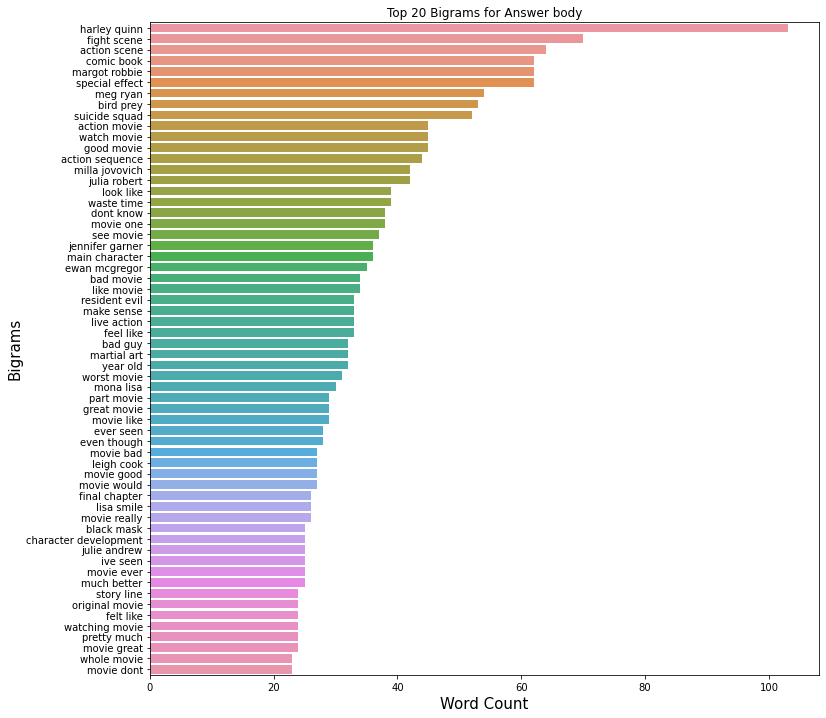

In [255]:
ans_bigram = generate_ngrams(df_3_fc[(df_3_fr["Rating Class"] == 0) & (df_3_fc["neg_fem_sent_score_norm"] > 0.2)]["Detokens"], 2, 60)

plt.figure(figsize=(12,12))
sns.barplot(ans_bigram["wordcount"],ans_bigram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Bigrams", fontsize=15)
plt.title("Top 20 Bigrams for Answer body")
plt.show()

C:\Users\farhanhasan\Anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


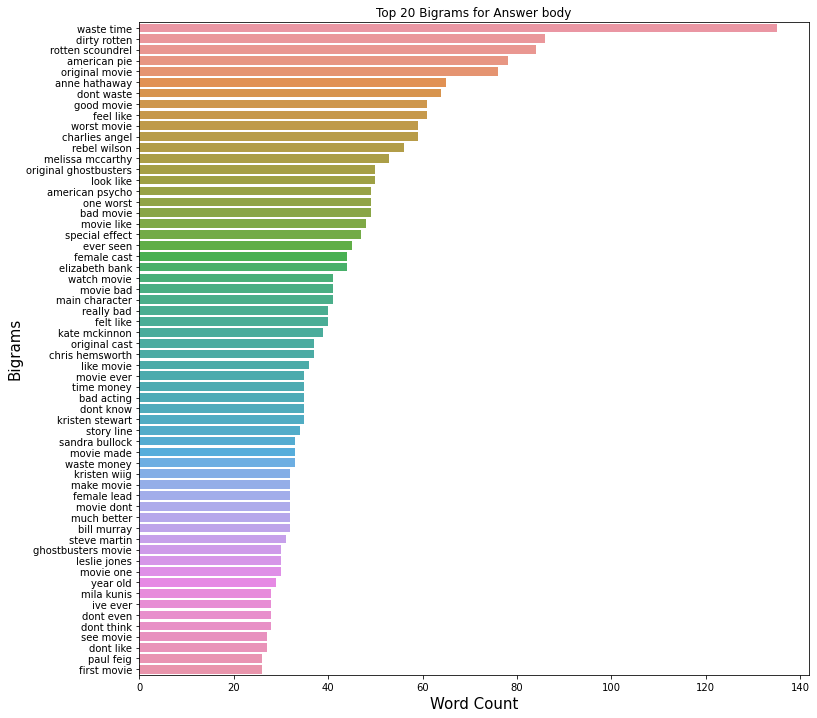

In [256]:
ans_bigram = generate_ngrams(df_3_fr[(df_3_fr["Rating Class"] == 0) & (df_3_fr["neg_fem_sent_score_norm"] > 0.2)]["Detokens"], 2, 60)

plt.figure(figsize=(12,12))
sns.barplot(ans_bigram["wordcount"],ans_bigram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Bigrams", fontsize=15)
plt.title("Top 20 Bigrams for Answer body")
plt.show()

C:\Users\farhanhasan\Anaconda3\envs\geo_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='neg_fem_sent_score_norm', ylabel='Density'>

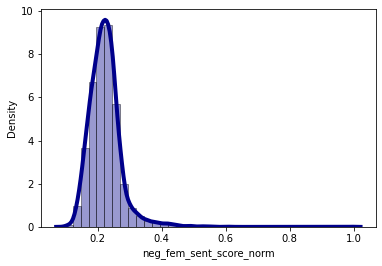

In [257]:
sns.distplot(df_3_fc['neg_fem_sent_score_norm'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\farhanhasan\Anaconda3\envs\geo_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='neg_fem_sent_score_norm', ylabel='Density'>

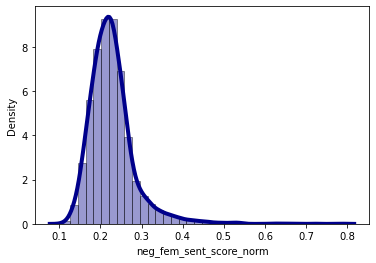

In [258]:
sns.distplot(df_3_fr['neg_fem_sent_score_norm'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [259]:
df_3_fr[(df_3_fr["Rating Class"] == 0)]["neg_fem_sent_score_norm"].mean()

0.2450398138914054

In [260]:
df_3_fc[(df_3_fc["Rating Class"] == 0)]["neg_fem_sent_score_norm"].mean()

0.2406375356550587

<AxesSubplot:xlabel='length', ylabel='neg_fem_sent_score_norm'>

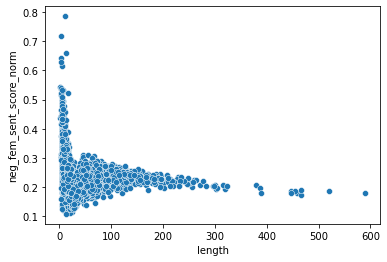

In [261]:
sns.scatterplot(x ="length", y = "neg_fem_sent_score_norm", data = df_3_fr)

<AxesSubplot:xlabel='length', ylabel='neg_fem_sent_score_norm'>

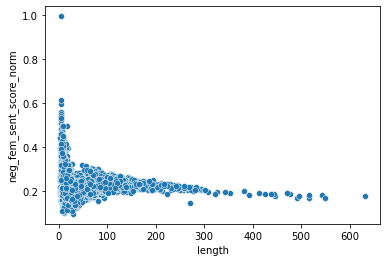

In [262]:
sns.scatterplot(x ="length", y = "neg_fem_sent_score_norm", data = df_3_fc)

take max 500-700 reviews from movies blockbusters
combine both datasets
try to use the rating class as a classifier and use 3 differetn machine learning algorithms and find best one
we could possibly use the rating and do rgression but it is better to do a classifier.


In [263]:
#pip install wordcloud


In [264]:
from wordcloud import WordCloud

from nltk.tokenize.treebank import TreebankWordDetokenizer

df_3_fr["Detokens"] = df_3_fr["Tokens"].apply(lambda x: TreebankWordDetokenizer().detokenize(x))

df_3_fc["Detokens"] = df_3_fc["Tokens"].apply(lambda x: TreebankWordDetokenizer().detokenize(x))


In [265]:
text_fr = " ".join(df_3_fr["Detokens"])

text_fc = " ".join(df_3_fc["Detokens"])

In [266]:
word_cloud_fr = WordCloud(width=1400, height=1200, collocations = False, background_color = 'white').generate(text_fr)


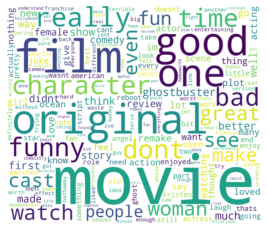

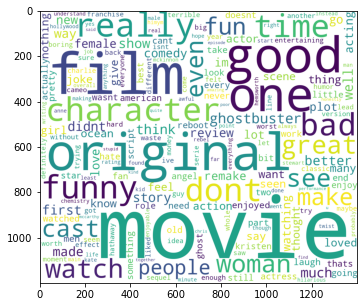

In [267]:
from matplotlib.pyplot import figure

plt.imshow(word_cloud_fr, interpolation='bilinear')
plt.axis("off")
plt.figure( figsize=(10,5) )
plt.imshow(word_cloud_fr)


In [268]:
word_cloud_fc = WordCloud(width=1400, height=1200, collocations = False, background_color = 'white').generate(text_fc)


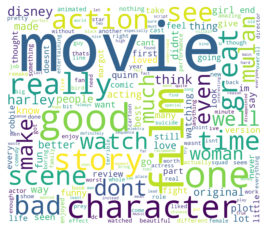

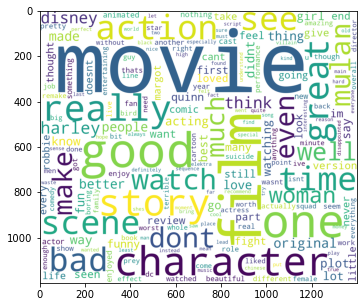

In [269]:


plt.imshow(word_cloud_fc, interpolation='bilinear')
plt.axis("off")
plt.figure( figsize=(10,5) )
plt.imshow(word_cloud_fc)
